In [ ]:
# class Kmeans:
#     def __init__(self):
#         print("A")

#     def fit(self, X, K, n_init, max_iter=300, tol=1e-4, distance_metric="euclidean"):
#         labels = []
#         num_clusters = K
#         # Get the cluster centroids
#         num_data_point = len(X)
#         random_num = np.random.randint(num_data_point, size=1)
#         centroid = [X[random_num]]
#         for k in range(1, num_clusters):
#             distance = []
#             distribution_proportion = []
#             for n in num_data_point:
#                 if distance_metric == "euclidean":
#                     distance.append(np.min([(euclidean_metrics(X[n], centroid[i])) for i in k]))
            
#             total_distance = np.sum(distance)
#             for n in num_data_point:
#                 distribution_proportion.append((np.square(distance[n]))/total_distance)
                
#             index_max_dp = np.where(distribution_proportion == np.max(distribution_proportion))
#             centroid[k] = X[index_max_dp]
        
#         # Getting labels
#         for n in num_data_point:
#             distance_dp_centroid = [euclidean_metrics(X[n], centroid[k]) for k in num_clusters]
#             cluster = np.where(distance_dp_centroid == np.min(distance_dp_centroid))
#             labels.append(cluster)    
            
#         return labels

#     def score(self, X):
#         return 0.0

In [2]:
def silhouette_score(x, labels):

    a = []
    b = []
    score = []
    for i in range(len(labels)):
        a.append(intra_cluster_distance(x, labels, i))
        b.append(nearest_cluster_distance(x, labels, i))
        score.append((b[i] - a[i]) / (np.maximum(a[i], b[i])))

    return np.mean(score)

In [5]:
def intra_cluster_distance(x, labels, i):
    same_cluster_indices = np.where(labels == labels[i])[0]
    if len(same_cluster_indices) == 0:
        a = 0
    else:
        distance = []
        for j in same_cluster_indices:
            if j != i:
                distance.append(euclidean_metrics(x[i], x[j]))
        a = np.mean(distance)

    return a

In [6]:
def nearest_cluster_distance(x, labels, i):
    different_cluster_indices = np.where(labels != labels[i])[0]
    if len(different_cluster_indices) == 0:
        b = 0
    else:
        distance_dict = {}
        for j in different_cluster_indices:
            key = labels[j]
            if key in distance_dict.keys():
                distance_dict[key].append(euclidean_metrics(x[i], x[j]))
            else:    
                distance_dict.update({key: [euclidean_metrics(x[i], x[j])]})
        
        mean_distance = []
        for row in distance_dict.values():
            mean_distance.append([np.mean(row)])
        
        min_mean_distance = np.min(mean_distance)
        b = min_mean_distance
    return b

In [7]:
def euclidean_metrics(x, y):
    distance_xy = np.square(np.subtract(x, y))
    sum_distance = np.sum(distance_xy)

    return np.sqrt(sum_distance)

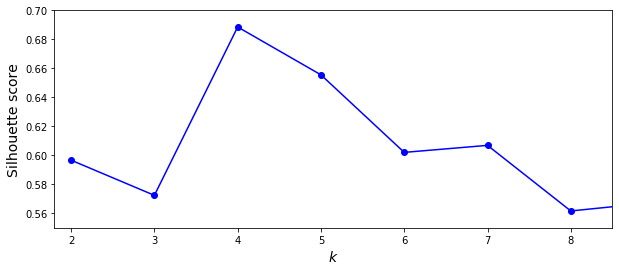

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

blob_centers = np.array(
    [[0.2, 2.3],
     [-1.5, 2.3],
     [-2.8, 1.8],
     [-2.8, 2.8],
     [-2.8, 1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])


x, y = make_blobs(n_samples=2000, centers=blob_centers,
                    cluster_std=blob_std, random_state=7)

# kmeans = KMeans()
# kmeans.fit()

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(x)
                    for k in range(1, 10)]

# getting the silhouette score
silhouette_scores = [silhouette_score(x, model.labels_)
                        for model in kmeans_per_k[1:]]

plt.figure(figsize=(10, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()


In [3]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import math
from sklearn.datasets import make_blobs


blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])


blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

class Kmeans:
    def __init__(self):
        print()

    def fit(self, X, K, n_init, max_iter=300, tol=1e-4, distance_metric="euclidean"):
    
        #K-Means++ ************

        #d = [0.0 for _ in range(len(X))]
        #print(d)
        random = X[np.random.randint(X.shape[0], size=1), :]
        #print(random)
        centroids = np.array(random)
        #np.append(centroids, random)
        #print(centroids)
        plt.scatter(centroids[:,0], centroids[:,1],  
                    color = 'blue', zorder=10)

        print(centroids[0]);

        for a in range(k-1):
            farthestDist = 0
            for b in range(X.shape[0]):
                closestDistToCentroid = math.inf
                for c in range(centroids.shape[0]): 
                    distanceToACentroid = np.linalg.norm(X[b,:]-centroids[c,:])
                    if closestDistToCentroid > distanceToACentroid:
                        closestDistToCentroid = distanceToACentroid
                        closestCentroid = centroids[c,:]

                distToClosestCentroid = np.linalg.norm(X[b,:]-closestCentroid)
                if distToClosestCentroid > farthestDist:
                    farthestDist = distToClosestCentroid
                    farthestPoint = X[b,:]
                    #print(dist)
                    #print(centroids[c,:])
                    #print(X[j,:])

            print(farthestDist)
            print(farthestPoint)

            centroids = np.vstack([centroids, farthestPoint])
            #farthestPoint = np.delete(farthestPoint, 1)
            plt.scatter(farthestPoint[0], farthestPoint[1],  color = 'red', zorder=10)

        #END K-Means++ ************

        #K-Means Assignment step **************
        closestCentroidArray = np.zeros(shape=(X.shape[0],2))

        for a in range(X.shape[0]):
            closestDistToCentroid = math.inf
            for b in range(centroids.shape[0]): 
                distanceToACentroid = np.linalg.norm(X[a,:]-centroids[b,:])
                if closestDistToCentroid > distanceToACentroid:
                    closestDistToCentroid = distanceToACentroid
                    closestCentroid = centroids[b,:]
            closestCentroidArray[a] = closestCentroid


        #print(closestCentroidArray)





        X1 = X[:,0]
        X2 = X[:,1]

        plt.plot() 
        plt.xlim([-4, 3]) 
        plt.ylim([-4, 3]) 
        plt.title('Dataset') 
        plt.scatter(X1, X2) 
        plt.show() 
        #print(X)
        
scaler = StandardScaler()
X = scaler.fit_transform(X)

kmeans = Kmeans()
kmeans.fit(1, X, 5, 4)
        
        
        
        
        
        

AttributeError: 'int' object has no attribute 'shape'

In [14]:
 def RangeQuery(X, distance_metric, p, eps):
        neighbors = []
        if distance_metric == "euclidean":
            for index in range(len(X)):
                if euclidean_metrics(X[index], p) <= eps:
                    neighbors.append(index)

        return neighbors

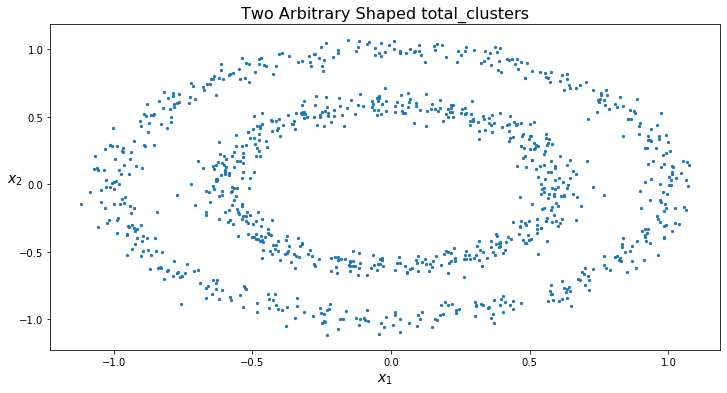


[-1.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41.]


In [17]:
from sklearn.datasets import make_blobs, make_circles

X, y = make_circles(n_samples=1000, noise=0.05, factor=0.6)

plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=None, s=5, cmap='autumn')

plt.title("Two Arbitrary Shaped total_clusters", fontsize=16)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.show()


data = pd.read_csv('./movies_metadata.csv')
data = data.dropna()
data.drop(data[data['vote_count'] <= 30 ].index, inplace=True)

print(data.head())

class DBSCAN:

    def __init__(self):
        print()

    def fit(self, X, eps, min_samples, distance_metric="euclidean"):
     
        cluster_num = 0
        noise = -1
        undefined = -2

        labels = np.empty(len(X)) # creating a list of empty array as labels
        labels.fill(undefined)  # fill the empty list with undefined values
        
        for index in range(len(X)): # iterating over each points index in data points
            if labels[index] != undefined:
                continue
            neighbors_indices = RangeQuery(X, distance_metric, X[index], eps)

            if len(neighbors_indices) < min_samples:
                labels[index] = noise
                continue

            cluster_num += 1
            labels[index] = cluster_num
            neighbors_indices = np.asarray([x for x in neighbors_indices if x != index])

            restart_loop = 0
            while restart_loop == 0:
                restart_loop = -1
                for i in neighbors_indices:
                    if labels[i] == noise:
                        labels[i] = cluster_num
    
                    elif labels[i] != undefined:
                        continue
    
                    labels[i] = cluster_num
                    new_neighbors_indices = RangeQuery(X, distance_metric, X[i], eps)
                    if len(new_neighbors_indices) >= min_samples:
                        neighbors_indices = np.union1d(neighbors_indices, new_neighbors_indices)
                        restart_loop = 0
                        break  
                    
        return labels


dbscan = DBSCAN()
labels = dbscan.fit(X, eps=0.05, min_samples=5, distance_metric="euclidean")
print(np.unique(labels))

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 

data = pd.read_csv('./movies_metadata.csv')
data = data.dropna()
data.drop(data[data['vote_count'] <= 30 ].index, inplace=True)

# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(data) 

print(data_scaled.head())

     adult                              belongs_to_collection    budget  \
9    False  {'id': 645, 'name': 'James Bond Collection', '...  58000000   
68   False  {'id': 43563, 'name': 'Friday Collection', 'po...   3500000   
69   False  {'id': 10924, 'name': 'From Dusk Till Dawn Col...  19000000   
178  False  {'id': 286162, 'name': 'Power Rangers Collecti...  15000000   
219  False  {'id': 182813, 'name': 'Clerks Collection', 'p...     27000   

                                                genres  \
9    [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
68                      [{'id': 35, 'name': 'Comedy'}]   
69   [{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...   
178  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
219                     [{'id': 35, 'name': 'Comedy'}]   

                                              homepage     id    imdb_id  \
9         http://www.mgm.com/view/movie/757/Goldeneye/    710  tt0113189   
68       http://www.newline.com/properties/frida

In [19]:
pip install pandas

     |████████████████████████████████| 9.8MB 7.4MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/e7/f9/f0b53f88060247251bf481fa6ea62cd0d25bf1b11a87888e53ce5b7c8ad2/pytz-2019.3-py2.py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
